# Numerical Optimization

## Introduction

We consider convex problems with sufficient regularity. Algorithms that use these properties can be broadly classified as either **Line Search** methods or **Trust Region** methods.

### Taylor's theorem

Suppose that $f: \mathbb{R}^n \rightarrow \mathbb{R}$  is continuously differentiable and that $p \in \mathbb{R}^n$. Then, we have that
$$f(x+p) = f(x) + \nabla f(x + tp)^T p,$$
for some $t \in (0,1)$. Furthermore, if $f$ is twice continuously differentiable,
$$\nabla f(x+p) = \nabla f(x) + \int_0^1 \nabla^2 f(x+tp) p\;\mathrm{d}t,$$
which implies
$$f(x+p) = f(x) + \nabla f(x)^T p + \frac{1}{2}p^T \nabla^2 f(x+tp) p,$$
for some $t \in (0,1)$.

## Preparation

Before we explore some approaches, we need a differentiable function complete with gradient information. We will use `PyTorch` and its auto-differentiation capabilities.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.autograd as autograd

Let us define an objective function, for which we would like to find the minimum.

In [192]:
n = 2

class fun(torch.nn.Module):
  def __init__(self, D_in):
    super().__init__()
    self.c = torch.randn(1)
    self.b = torch.randn(D_in, 1)
    self.A = np.random.standard_exponential((D_in,D_in))
    #self.A = np.tril(self.A) + np.tril(self.A, -1).T
    self.A = torch.from_numpy(self.A).float()
    self.A = self.A.T @ self.A
  def forward(self, x):
    x = torch.from_numpy(x).float()
    x.requires_grad = True
    y = torch.sum(x * (self.A@x), 0) - 2.0 * self.b.T @ x + self.c
    return y
    
objective_function = fun(n)

In [193]:
# getting the gradient
x0 = np.random.rand(2,1)
f0 = objective_function(x0) # forward pass
grad = f0.backward() # after having computed one step, this will compute the gradient
x0

array([[0.255753  ],
       [0.14744262]])

In [207]:
x = np.linspace(-10, 10, 40)
y = np.linspace(-10, 10, 40)
X, Y = np.meshgrid(x, y)
grid = np.vstack((X.flatten(),Y.flatten()))
Z = objective_function(grid)
Z = np.reshape(Z.detach().numpy(), (40,40))

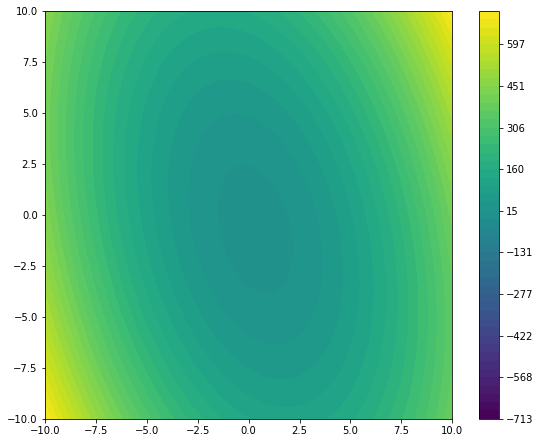

In [217]:
plt.gca().set_aspect("equal")
plt.gcf().set_size_inches(9.5, 7.5)
contourplot = plt.contourf(X, Y, Z, levels=np.linspace(-np.amax(Z),np.amax(Z),50))
cbar = plt.colorbar(contourplot)
plt.show()

## Steepest Descent Optimizer

The core idea of Line Search method is to pick a descent direction $p_k$ and a step size $\alpha$. The natural choice for $p_k$ is to take $-\nabla f(x_k)$. Taking the appropriate step size is a more difficult problem to solve.

In [ ]:
def backtrack(f0, alpha0, x, p):
  t = -0.5*np.norm(f0)
  j = 0
  while 

In [ ]:
def iterate(f, x0, alpha):
  f0 = f(x0)
  p0 = f0.backward()
  # compute the Wolfe condition
  return x0 - alpha*p0
  